# **1. Import**

In [25]:
# import libraries
import pandas as pd
import numpy as np
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
# import sklearn libararies
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from scipy import stats as sstats
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# **2. Read Data**

In [26]:
data = pd.read_csv('training_data.csv')

# **3. Glimps Data**

In [27]:
data.head()

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,USROP_A 0 N-NA_F-9_Ad,491.033,5.842270,9440.922214,0.244047,42.864024,84.0,2784.321942,1.21,311.15,93.780222,490.760309,150.88
1,USROP_A 0 N-NA_F-9_Ad,491.185,6.241431,9499.941336,0.244047,42.315384,84.0,2784.321942,1.21,311.15,93.979803,490.910880,150.88
2,USROP_A 0 N-NA_F-9_Ad,491.222,6.241431,9499.941336,0.244047,42.315384,84.0,2784.321942,1.21,311.15,93.979803,490.910880,150.88
3,USROP_A 0 N-NA_F-9_Ad,491.338,6.368437,9313.024466,0.216931,42.894504,84.0,2784.321942,1.21,311.15,94.079593,491.061756,146.26
4,USROP_A 0 N-NA_F-9_Ad,491.341,6.368437,9313.024466,0.216931,42.894504,84.0,2784.321942,1.21,311.15,94.079593,491.061756,146.26


In [28]:
data.describe(include='all')

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,USROP_A 3 N-SH-F-15d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,53041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,NaN,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,NaN,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,NaN,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,NaN,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,NaN,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000


In [30]:
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


In [5]:
data_column = data.columns
print(data_column)
ROP = data_column[5]
WID = data_column[0]
MDM = data_column[1]
MFL = data_column[7]
RPM = data_column[6]

Index(['Well Identifier', 'Measured Depth m', 'Weight on Bit kkgf',
       'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
       'Rate of Penetration m/h', 'Average Rotary Speed rpm',
       'Mud Flow In L/min', 'Mud Density In g/cm3', 'Diameter mm',
       'Average Hookload kkgf', 'Hole Depth (TVD) m', 'USROP Gamma gAPI'],
      dtype='object')


In [6]:
wells = data['Well Identifier']
wells = np.unique(wells)
print(wells)

['USROP_A 0 N-NA_F-9_Ad' 'USROP_A 1 N-S_F-7d' 'USROP_A 2 N-SH_F-14d'
 'USROP_A 3 N-SH-F-15d' 'USROP_A 4 N-SH_F-15Sd' 'USROP_A 5 N-SH-F-5d'
 'USROP_A 6 N-SH_F-9d']


# **4. Exploratory Data Analysis**

In [7]:
# remove all rows that contains missing value
data.replace(['-999', -999], np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.describe(include='all')

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,USROP_A 3 N-SH-F-15d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,53041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,NaN,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,NaN,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,NaN,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,NaN,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,NaN,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000


In [8]:
data.isna().any()

Well Identifier                   False
Measured Depth m                  False
Weight on Bit kkgf                False
Average Standpipe Pressure kPa    False
Average Surface Torque kN.m       False
Rate of Penetration m/h           False
Average Rotary Speed rpm          False
Mud Flow In L/min                 False
Mud Density In g/cm3              False
Diameter mm                       False
Average Hookload kkgf             False
Hole Depth (TVD) m                False
USROP Gamma gAPI                  False
dtype: bool

In [9]:
# Feature scaling: Convert samples of each attribute to normal distribution
data_scaled = data.copy()

features = data_column.drop(WID).drop(ROP)

data_scaled[features] = MinMaxScaler().fit_transform(data_scaled[features])

data_scaled.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,0.565771,0.193769,0.679741,0.395335,24.978426,0.489567,0.617537,0.271727,0.356827,0.630901,0.637882,0.257563
std,0.275935,0.125985,0.179775,0.198449,15.086731,0.160649,0.242453,0.408851,0.438951,0.225786,0.280005,0.193638
min,0.000000,0.000000,0.000000,0.000000,0.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.342451,0.104480,0.561124,0.264021,12.990000,0.415288,0.415459,0.025461,0.000000,0.593469,0.427170,0.097279
50%,0.639617,0.165190,0.647181,0.350615,21.090000,0.448980,0.444739,0.030007,0.000000,0.680294,0.762029,0.208855
75%,0.792732,0.258690,0.836843,0.488126,32.470001,0.576047,0.873515,0.893760,1.000000,0.793734,0.873216,0.376161
max,1.000000,1.000000,1.000000,1.000000,99.206304,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
def get_well_data(well_id, wd):
    well_data = wd[wd['Well Identifier'] == wells[well_id]]
    return well_data

# Data analysis

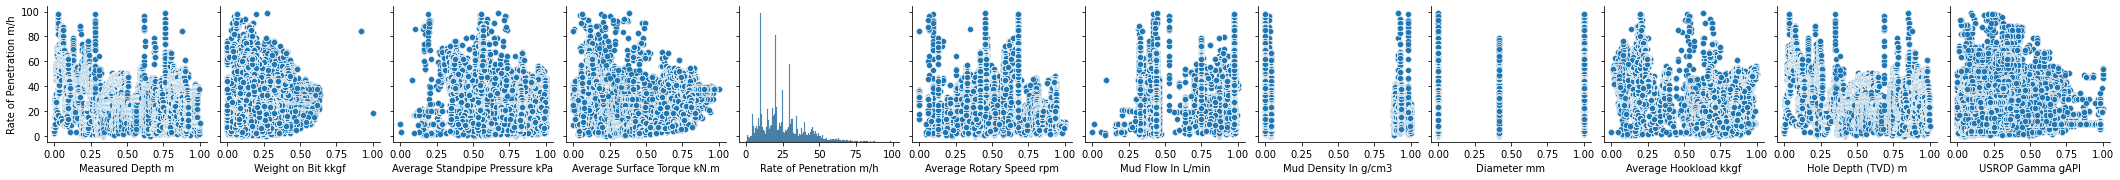

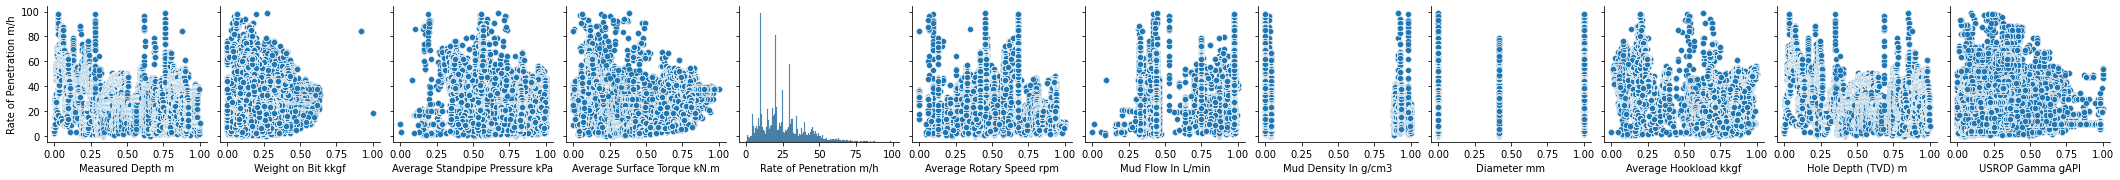

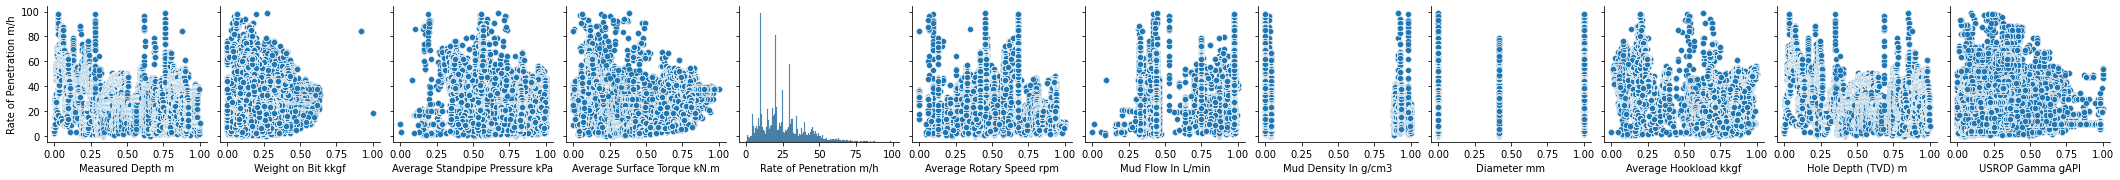

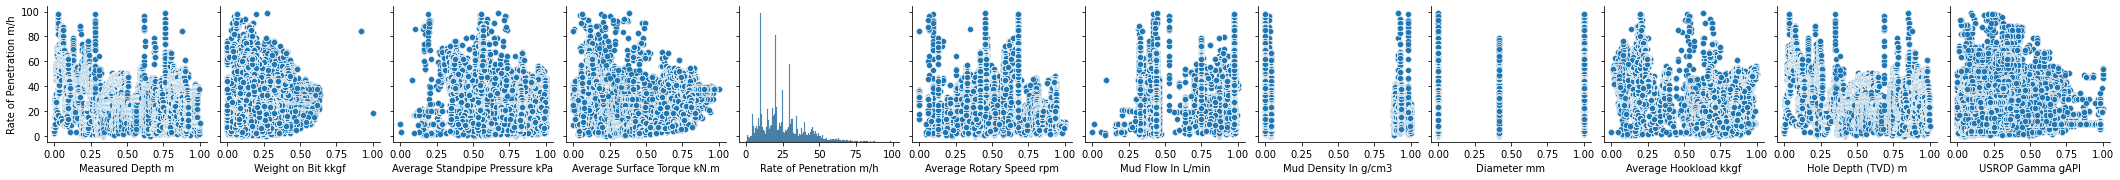

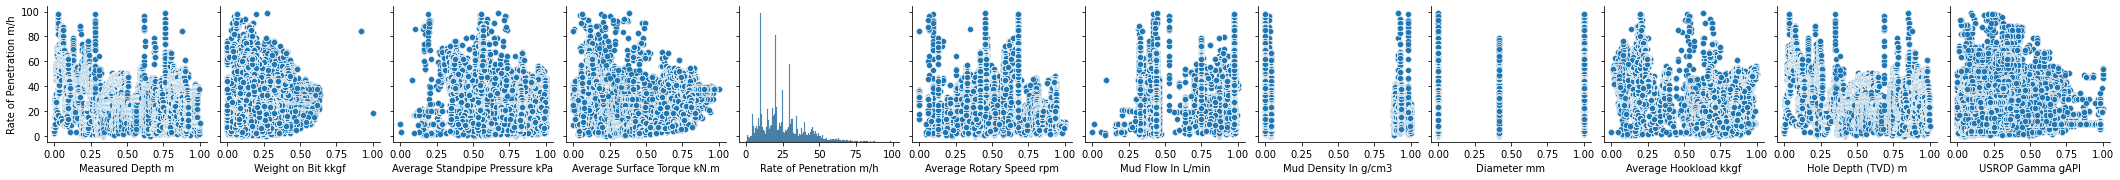

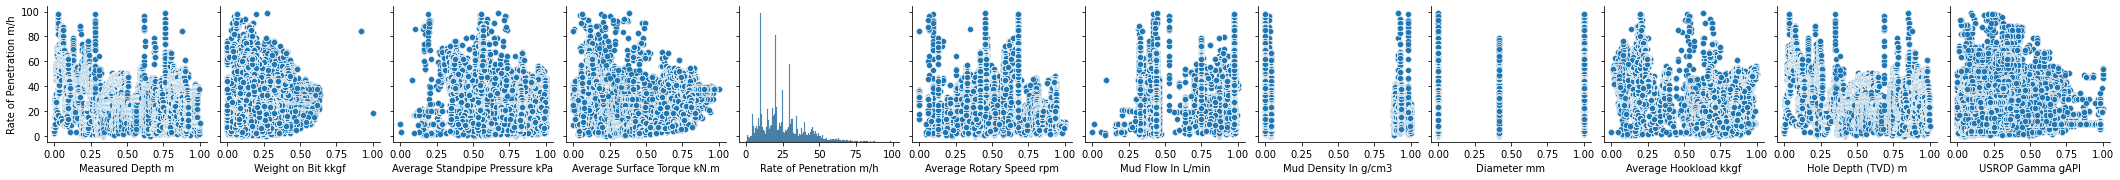

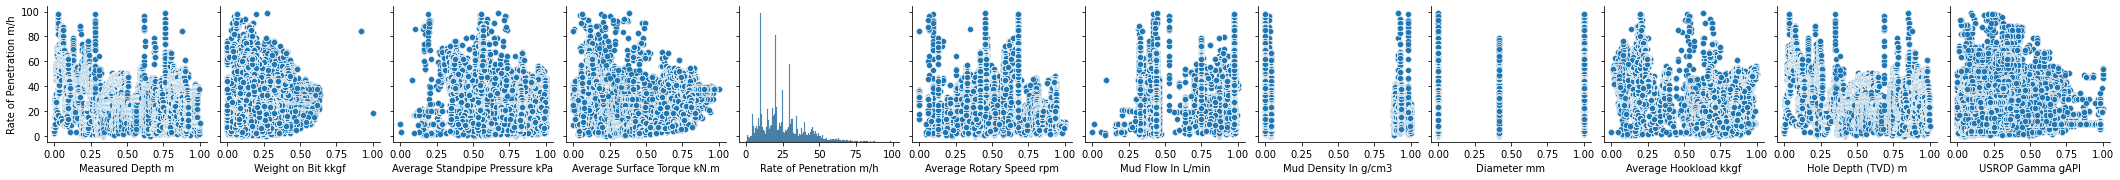

In [69]:
for i in range(7):
    sb.pairplot(data_scaled, y_vars=[ROP])

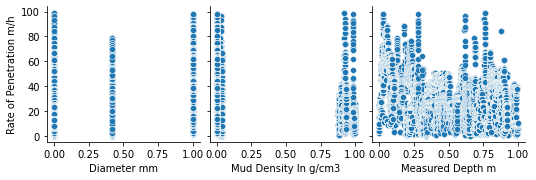

In [14]:
sb.pairplot(data_scaled, y_vars=[ROP], x_vars=['Diameter mm', 'Mud Density In g/cm3', 'Measured Depth m']) #'Diameter mm' and 'Mud Density In g/cm3' is not useful as ROP range is same for all possible values
plt.savefig('ROP_relation.png', dpi=400, format="png")

/home/lemon/AI/lib64/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


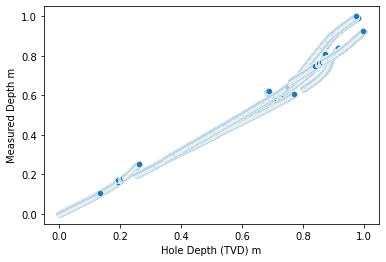

In [18]:
sb.scatterplot(data_scaled['Hole Depth (TVD) m'], data_scaled[MDM])
# figure = svm.get_figure()
plt.savefig('linear_relation.png', dpi=400, format="png")

# Convert ROP to labels

In [21]:
data_sor = data_scaled.sort_values(by=[ROP])
data_sor.head()

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
50010,USROP_A 2 N-SH_F-14d,0.655025,0.266807,0.504262,0.224003,0.33,0.225171,0.34232,0.02637,0.0,0.738109,0.821157,0.050518
50007,USROP_A 2 N-SH_F-14d,0.655009,0.266807,0.504262,0.224003,0.33,0.225171,0.34232,0.02637,0.0,0.738109,0.821141,0.050518
50006,USROP_A 2 N-SH_F-14d,0.655003,0.266807,0.504262,0.224003,0.33,0.225171,0.34232,0.02637,0.0,0.738109,0.821135,0.050518
50005,USROP_A 2 N-SH_F-14d,0.654994,0.266807,0.504262,0.224003,0.33,0.225171,0.34232,0.02637,0.0,0.738109,0.821127,0.050518
50004,USROP_A 2 N-SH_F-14d,0.654981,0.266807,0.504262,0.224003,0.33,0.225171,0.34232,0.02637,0.0,0.738109,0.821114,0.040782


<AxesSubplot:xlabel='Rate of Penetration m/h', ylabel='Density'>

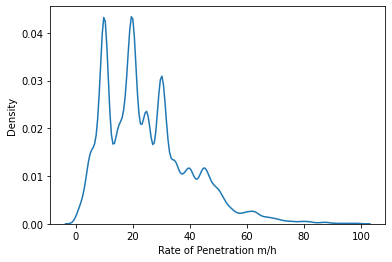

In [41]:
sb.kdeplot(data[ROP])
# data_sor.describe()
# plt.savefig("ROP_pdf.png", dpi=400)

(0.329, 6.797]
(6.797, 9.94]
(9.94, 10.05]
(10.05, 12.99]
(12.99, 16.25]
(16.25, 18.782]
(18.782, 19.83]
(19.83, 21.09]
(21.09, 24.885]
(24.885, 27.873]
(27.873, 29.922]
(29.922, 32.47]
(32.47, 37.725]
(37.725, 44.06]
(44.06, 50.13]
(50.13, 99.206]


array([ 4.49192809,  8.53823616, 10.00481801, 10.96403047, 14.77491638,
       17.6722854 , 19.51645602, 20.30622657, 23.2117128 , 25.80622952,
       29.41359718, 30.96422592, 35.20331785, 40.80629931, 46.77587972,
       61.26145846])

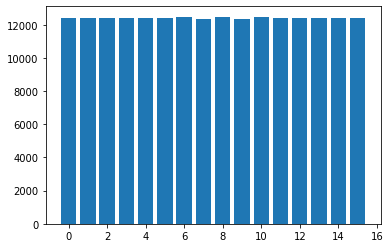

In [74]:
data_labeled = data_sor.copy()

bins_count = 16
bins = pd.qcut(data_labeled[ROP], bins_count)
group = data[ROP].groupby(bins)
data_labeled[ROP] = group.transform('mean')

# group[ROP].unique()
for x in group.groups:
    print(x)
dfs = [group.get_group(x) for x in group.groups]
dfs_count = [x.count() for x in dfs]
plt.bar(range(len(dfs_count)), dfs_count)
data_labeled[ROP].unique()
# data[data[MDM] == 1530.888]

In [15]:
# drop 'Diameter mm', 'Mud Density In g/cm3' as it gives no useful hint on ROP.
# Also drop 'Hole Depth (TVD) m' as it is dependent on 'Measured Depth m'
features = data_scaled.columns.drop(['Diameter mm', 'Mud Density In g/cm3', 'Measured Depth m'])
features

Index(['Well Identifier', 'Weight on Bit kkgf',
       'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
       'Rate of Penetration m/h', 'Average Rotary Speed rpm',
       'Mud Flow In L/min', 'Average Hookload kkgf', 'Hole Depth (TVD) m',
       'USROP Gamma gAPI'],
      dtype='object')

# **5. Build Machine Learning Models**

#### Preparing data for training

In [16]:
for i in range(7):
    print(i, wells[i], "\t", get_well_data(i, data_scaled).shape)
    
# Let's pick Well-6 for test/validation

0 USROP_A 0 N-NA_F-9_Ad 	 (13746, 13)
1 USROP_A 1 N-S_F-7d 	 (6389, 13)
2 USROP_A 2 N-SH_F-14d 	 (47645, 13)
3 USROP_A 3 N-SH-F-15d 	 (53041, 13)
4 USROP_A 4 N-SH_F-15Sd 	 (51708, 13)
5 USROP_A 5 N-SH-F-5d 	 (18548, 13)
6 USROP_A 6 N-SH_F-9d 	 (7851, 13)


In [17]:
X = data_scaled[features].drop(columns=[WID, ROP])
y = data_scaled[ROP]

train_data = data_scaled[data_scaled[WID] != 'USROP_A 6 N-SH_F-9d']
test_data = data_scaled[data_scaled[WID] == 'USROP_A 6 N-SH_F-9d']

X_train = train_data[features].drop(columns=[WID, ROP])
y_train = train_data[ROP]
X_test = test_data[features].drop(columns=[WID, ROP])
y_test = test_data[ROP]

In [78]:
X_train.shape, X_test.shape

((191077, 8), (7851, 8))

# ML models

### Cross_validate different models

In [17]:
rfr_model = RandomForestRegressor(n_estimators=80, random_state=5754)
# param_distributions = {'n_estimators': sstats.randint(7, 20), 'max_depth': sstats.randint(5, 15)}
# search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=11, criterion='mae', n_jobs=6),n_iter=5, param_distributions=param_distributions, random_state=0)
# search.fit(X_train, y_train)
# rfr_cv = cross_validate(rfr_model, X, y, cv=5, n_jobs=4, scoring=['neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'r2', 'neg_median_absolute_error'])

In [18]:
rfr_cv

{'fit_time': array([125.87943554, 122.89956236, 109.36680079, 106.5708127 ,
         85.95389318]),
 'score_time': array([0.1762979 , 0.18572235, 0.21325564, 0.21511221, 0.14043617]),
 'test_neg_mean_absolute_percentage_error': array([-0.77400405, -0.8565545 , -0.36539159, -0.59456513, -1.11154429]),
 'test_neg_mean_squared_error': array([-359.90260219, -137.2744698 , -113.47473272, -134.54195812,
        -268.46588906]),
 'test_r2': array([-0.47986606, -0.3090803 , -0.44433918, -0.53000286,  0.28509457])}

In [48]:
nn_model = MLPRegressor(max_iter=200, random_state=56, solver="lbfgs", activation="relu", hidden_layer_sizes=(26, 52, 26))
nn_cv = cross_validate(nn_model, X, y, cv=5, n_jobs=4, scoring=['neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'r2', 'neg_median_absolute_error'])

In [49]:
nn_cv

{'fit_time': array([177.96945119, 160.373348  , 176.42188311, 167.11386395,
         82.20445895]),
 'score_time': array([0.04057217, 0.06879807, 0.07228947, 0.06836629, 0.03123021]),
 'test_neg_mean_absolute_percentage_error': array([-0.5217105 , -0.95010358, -0.28519049, -1.17253961, -1.24275143]),
 'test_neg_mean_squared_error': array([-206.65129145, -123.57804253,  -73.77325219, -533.36574799,
        -295.98692463]),
 'test_r2': array([ 0.15028058, -0.17846808,  0.06099273, -5.06540243,  0.21180802]),
 'test_neg_median_absolute_error': array([-10.17034252,  -5.99968506,  -4.3240199 , -14.91912273,
        -11.3429081 ])}

## NN

In [40]:
nn_model = MLPRegressor(max_iter=5, learning_rate_init=0.1, random_state=56, solver="adam", activation="relu", early_stopping=True, hidden_layer_sizes=(100, 52))
nn_model.fit(X_train, y_train)

/home/lemon/AI/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 52),
             learning_rate_init=0.1, max_iter=5, random_state=56)

In [41]:
nn_model.loss_curve_

[582022.1819661042,
 453512.95379165094,
 438140.0195109009,
 412507.1475775055,
 375833.28879940085]

In [42]:
nn_model.score(X_test, y_test)

-0.5266110834269397

In [43]:
y_pred_test = nn_model.predict(X_test)
mean_absolute_error(y_test, y_pred_test)

1821.7140499669395

## Random forest

In [18]:
rfr_model = RandomForestRegressor(n_estimators=8, random_state=5754)
rfr_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=8, random_state=5754)

In [26]:
# rfr_model = pickle.load(open('rfr_model_80.pkl', 'rb'))

In [19]:
y_pred_test = rfr_model.predict(X_test)

In [20]:
mean_absolute_error(y_test.values, y_pred_test)

7.54096082711725

In [21]:
rfr_model.score(X_test, y_test)

0.29439233706767887

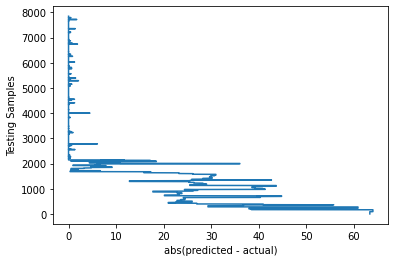

In [24]:
y_err = [np.abs(y_pred_test[i] - y_test.values[i]) for i in range(len(y_pred_test))]
plt.plot(y_err, range(len(y_pred_test)))
plt.xlabel("abs(predicted - actual)")
plt.ylabel("Testing Samples")
plt.savefig("RFR accuracy.png", dpi=400)

## Decision tree / KNN regressor

(0.329, 8.84]
(8.84, 10.138]
(10.138, 15.48]
(15.48, 19.626]
(19.626, 21.09]
(21.09, 25.62]
(25.62, 30.179]
(30.179, 36.75]
(36.75, 45.821]
(45.821, 99.206]


array([ 5.76826973,  9.89653719, 12.85926164, 17.82936629, 20.0774591 ,
       23.92194564, 28.87360777, 32.94738778, 41.41362696, 56.28341325])

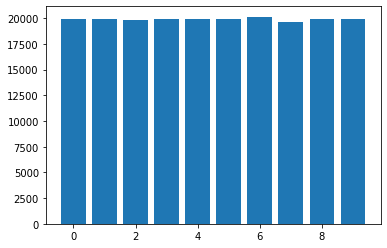

In [18]:
data_labeled = data_sor.copy()

bins_count = 10
bins = pd.qcut(data_labeled[ROP], bins_count)
group = data[ROP].groupby(bins)
data_labeled[ROP] = group.transform('mean')

# group[ROP].unique()
for x in group.groups:
    print(x)
dfs = [group.get_group(x) for x in group.groups]
dfs_count = [x.count() for x in dfs]
plt.bar(range(len(dfs_count)), dfs_count)
data_labeled[ROP].unique()
# data[data[MDM] == 1530.888]

In [19]:
X = data_scaled[features].drop(columns=[WID, ROP])
y = data_scaled[ROP]

# X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_data = data_labeled[data_labeled[WID] != 'USROP_A 6 N-SH_F-9d']
test_data = data_labeled[data_labeled[WID] == 'USROP_A 6 N-SH_F-9d']

X = data_labeled[features].drop(columns=[WID, ROP])
y = data_labeled[ROP]

X_train = train_data[features].drop(columns=[WID, ROP])
y_train = train_data[ROP]
X_test2 = test_data[features].drop(columns=[WID, ROP])
y_test2= test_data[ROP]

X_train.shape, y_train.shape, X_test2.shape, y_test2.shape, X_test.shape, y_test.shape

((191077, 8), (191077,), (7851, 8), (7851,), (7851, 8), (7851,))

In [87]:
model_dt = DecisionTreeRegressor(random_state=52, max_depth=80)
# model_dt = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
# model_dt = RadiusNeighborsRegressor(radius=0.5)
# model_dt = SVR(C=1.0, epsilon=0.2)
# model_dt = MLPRegressor(max_iter=20, learning_rate_init=0.1, random_state=56, solver="adam", activation="relu", early_stopping=True, hidden_layer_sizes=(100, 52))
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=80, random_state=52)

In [88]:
y_pred_test = model_dt.predict(X_test)
mean_absolute_error(y_test, y_pred_test)

10.371211220896708

,0
count,7851.000000
mean,11.178831
std,12.894580
min,0.000000
25%,2.000000
50%,6.000000
75%,15.000000
max,53.000000


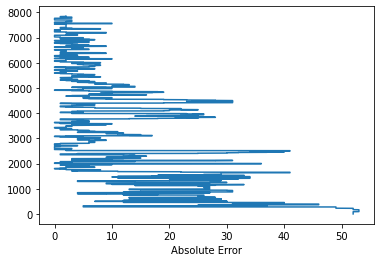

In [22]:
y_err = [int(np.abs(y_pred_test[i] - y_test.values[i])) for i in range(len(y_pred_test))]
plt.plot(y_err, range(len(y_pred_test)))
plt.xlabel("Absolute Error")
pd.DataFrame(y_err).describe()
# plt.plot(y_pred_test-y_test.values)

# for i in range(len(y_test.values)):
#     if np.abs(y_pred_test[i] - y_test.values[i]) > 30:
#         print(y_pred_test[i], y_test.values[i])

# Super learning

In [90]:
# example of a super learner model for regression
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor

class super_learner_model:
    def __init__(self, Ksplit=2):
        self.models = self.get_models()
        self.meta_model = None
        self.Ksplit = Ksplit
        
    def fit(self, X_train, y_train):
        meta_X, meta_y = self.get_out_of_fold_predictions(X_train.values, y_train.values)
        print('Meta ', meta_X.shape, meta_y.shape)
        self.fit_base_models(X_train, y_train)
        self.meta_model = self.fit_meta_model(meta_X, meta_y)
        
    def predict(self, X_test):
        if (self.meta_model == None):
            print("Fit not done")
            return -1
        return self.super_learner_predictions(X_test)
    
    # create a list of base-models
    def get_models(self):
        models = list()
        models.append(MLPRegressor(random_state=56, solver="adam", activation="relu", early_stopping=True, hidden_layer_sizes=(100, 52)))
        models.append(DecisionTreeRegressor(random_state=52, max_depth=40))
        models.append(KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto'))
        models.append(XGBRegressor(n_estimators=300, max_depth=20, n_jobs=-1))
        models.append(BaggingRegressor(n_estimators=10, n_jobs=-1))
        models.append(RandomForestRegressor(n_estimators=10, n_jobs=-1))
        return models

    # collect out of fold predictions form k-fold cross validation
    def get_out_of_fold_predictions(self, X, y):
        meta_X, meta_y = list(), list()
        # define split of data
        kfold = KFold(n_splits=self.Ksplit, shuffle=True)
        # enumerate splits
        for train_ix, test_ix in kfold.split(X):
            print(train_ix, test_ix)
            fold_yhats = list()
            # get data
            train_X, test_X = X[train_ix], X[test_ix]
            train_y, test_y = y[train_ix], y[test_ix]
            meta_y.extend(test_y)
            # fit and make predictions with each sub-model
            for model in self.models:
                print("trying model", model.__class__.__name__)
                model.fit(train_X, train_y)
                yhat = model.predict(test_X)
                # store columns
                fold_yhats.append(yhat.reshape(len(yhat),1))
            # store fold yhats as columns
            meta_X.append(hstack(fold_yhats))
        return vstack(meta_X), asarray(meta_y)

    # fit all base models on the training dataset
    def fit_base_models(self, X, y):
        for model in self.models:
            model.fit(X, y)

    # fit a meta model
    def fit_meta_model(self, X, y):
        model = KNeighborsRegressor()
        model.fit(X, y)
        return model

    # evaluate a list of models on a dataset
    def evaluate_models(self, X, y):
        for model in self.models:
            yhat = model.predict(X)
            mse = mean_absolute_error(y, yhat)
            print('%s: MAE %.3f' % (model.__class__.__name__, mse))

    # make predictions with stacked model
    def super_learner_predictions(self, X):
        meta_X = list()
        for model in self.models:
            yhat = model.predict(X)
            meta_X.append(yhat.reshape(len(yhat),1))
        meta_X = hstack(meta_X)
        # predict
        return self.meta_model.predict(meta_X)


print('Train', X_train.shape, y_train.shape, 'Test', X_test.shape, y_test.shape)
# get models
# models = get_models()
# get out of fold predictions
# meta_X, meta_y = get_out_of_fold_predictions(X_train.values, y_train.values, models)
# print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
# fit_base_models(X_train, y_train, models)
# fit the meta model
# meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
# evaluate_models(X_test, y_test, models)
# evaluate meta model
# yhat = super_learner_predictions(X_test, models, meta_model)
sl_model = super_learner_model(Ksplit=4)
sl_model.fit(X, y)
sl_model.evaluate_models(X_test, y_test)
yhat = sl_model.predict(X_test)
print('Super Learner: MAE %.3f' % (mean_absolute_error(y_test, yhat)))

Train (191077, 8) (191077,) Test (7851, 8) (7851,)


NameError: name 'XGBRegressor' is not defined

# Testing open data set

In [23]:
test_data = pd.read_csv('test_data.csv')

In [24]:
test_data.drop(['Well Identifier'], axis='columns', inplace=True)

In [25]:
test_data_scaled = test_data.copy()

In [26]:
features2 = features.drop([WID, ROP])
features2

Index(['Weight on Bit kkgf', 'Average Standpipe Pressure kPa',
       'Average Surface Torque kN.m', 'Average Rotary Speed rpm',
       'Mud Flow In L/min', 'Average Hookload kkgf', 'Hole Depth (TVD) m',
       'USROP Gamma gAPI'],
      dtype='object')

In [27]:
test_data_scaled[features2] = MinMaxScaler().fit_transform(test_data[features2])

In [28]:
test_data_scaled[features2].describe()

,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,114299.000000,114299.000000,114299.000000,114299.000000,114299.000000,114299.000000,114299.000000,114299.000000
mean,0.296159,0.760117,0.572074,0.805421,0.565754,0.587422,0.791430,0.078884
std,0.176828,0.163380,0.160572,0.187653,0.226641,0.185250,0.160655,0.104811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.183195,0.682373,0.508080,0.793948,0.396142,0.535044,0.803940,0.010088
50%,0.285347,0.782538,0.564825,0.843454,0.433764,0.572612,0.866495,0.017372
75%,0.378854,0.892535,0.676099,0.946605,0.716221,0.640347,0.874047,0.113527
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
y_pred_open_test = model_dt.predict(test_data_scaled[features2])

In [34]:
np.mean(y_pred_open_test)

21.5919891036334

In [33]:
np.std(y_pred_open_test)

14.383137077142086

In [35]:
csv_op = pd.Series(y_pred_open_test)
# type(tuple(np.transpose(best_data_noneg.values)))
np.savetxt('test_predictions_knn_4.csv', csv_op, header='Rate of Penetration', comments='', fmt='%f')